In [1]:
# coding=utf-8
from lytools import *  ## pip install lytools==0.0.47
data_path = '../../data/SI_Fig10'
land_path = '../../data/common_data/land_mask.tif'

lytools version 0.0.47


In [2]:
def plot_spatial(ax,fpath,vmin=None,vmax=None,cmap=None):
    ## plot spatial figure
    array = ToRaster().raster2array(fpath)[0]
    # mask nan values
    array[array < -9999] = np.nan
    # above 30 degree
    array = array[:120]
    # plot the spatial figure
    pcm = ax.imshow(array, cmap=cmap, vmin=vmin, vmax=vmax, aspect='auto', interpolation='nearest')
    # plot the land mask
    arr = ToRaster().raster2array(land_path)[0]
    back_ground = []
    for i in range(len(arr)):
        temp = []
        for j in range(len(arr[0])):
            val = arr[i][j]
            if val < -90000:
                temp.append(np.nan)
            else:
                temp.append(1)
        back_ground.append(temp)
    back_ground = np.array(back_ground)
    ax.imshow(back_ground[:int(len(arr) / 2)], 'gray', vmin=0, vmax=1.4, zorder=-1, aspect='auto', interpolation='nearest')
    return pcm



In [3]:
def plot_SI_Fig10():
    ## plot figure S10
    pheno_list = ['SOS','EOS','GS_length']
    pheno_limite_dict = {'SOS':(90,180),'EOS':(220,350),'GS_length':(90,300)}
    cmap1 = sns.diverging_palette(273, 120, s=100, l=35, as_cmap=True)
    cmap2 = sns.diverging_palette(120, 273, s=100, l=35, as_cmap=True)
    color_list = ['#007F00','#FFFCCA','#793D8A']
    cmap1 = sns.blend_palette(color_list[::-1],as_cmap=True,)
    cmap2 = sns.blend_palette(color_list,as_cmap=True,)
    cmap_dict = {'SOS':cmap2, 'EOS':cmap1, 'GS_length':cmap1}

    fig,axs = plt.subplots(1,3,figsize=(12,3))
    col = 0
    for pheno in pheno_list:
        fname = f'{pheno}.tif'
        fpath = join(data_path, fname)
        ax = axs[col]
        pcm = plot_spatial(ax,fpath,vmin=pheno_limite_dict[pheno][0],vmax=pheno_limite_dict[pheno][1],cmap=cmap_dict[pheno])
        ax.set_title(f'{fname[:-4]}')
        ax.set_xticks([])
        ax.set_yticks([])
        col += 1
        plt.colorbar(pcm,ax=ax,location='bottom',label='Day of Year')
    plt.show()
    pass



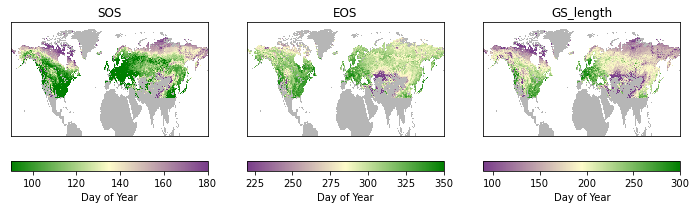

In [4]:
plot_SI_Fig10()